In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import sys
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./Dataset.csv', delimiter=';', encoding='latin-1')

In [3]:
data.shape

(1000, 15)

In [4]:
data.sample(5)

,url,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
949,http://www.imagebankexpress.com/4615/Chicken-T...,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Dua domain,Ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Tidak ada DOM objects,Terdapat javascript method,XSS
814,http://www.kaspersky.cl/certificaciones/?year=...,Lebih dari 75,Mengarah ke domain sendiri,Tersimpan di database whois,Ada obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Terdapat HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Tidak ada DOM objects,Terdapat javascript method,XSS
778,http://search.babeland.com/?Ntt=%3Cscript%3Eal...,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Terdapat DOM objects,Terdapat javascript method,XSS
485,http://tv1.rtp.pt/EPG/radio/programas/index.ph...,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Dua domain,Ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Tidak ada DOM objects,Tidak ada javascript method,XSS
291,http://www.bnt-chemicals.de/,Kurang dari 54,Mengarah ke domain sendiri,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Domain tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Tidak ada DOM objects,Tidak ada javascript method,non-XSS


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
url                             1000 non-null object
url_length                      1000 non-null object
server_form_handler             1000 non-null object
abnormal_url                    1000 non-null object
obfuscated_code                 1000 non-null object
number_of_domain                1000 non-null object
number_of_third-party_domain    1000 non-null object
request_for_cookie              1000 non-null object
google_index                    1000 non-null object
html_tags                       1000 non-null object
html_properties                 1000 non-null object
event_handler                   1000 non-null object
dom_object                      1000 non-null object
javascript_method               1000 non-null object
label                           1000 non-null object
dtypes: object(15)
memory usage: 117.3+ KB


In [6]:
data.isnull().sum()

url                             0
url_length                      0
server_form_handler             0
abnormal_url                    0
obfuscated_code                 0
number_of_domain                0
number_of_third-party_domain    0
request_for_cookie              0
google_index                    0
html_tags                       0
html_properties                 0
event_handler                   0
dom_object                      0
javascript_method               0
label                           0
dtype: int64

In [7]:
data.describe()

,url,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,3,2,2,3,2,2,2,2,2,2
top,"http://logiclord.com/index.php?x=0&y=0&s=""%2F>...",Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Tidak obfuscated,Dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Tidak ada EventHandler,Tidak ada DOM objects,Tidak ada javascript method,XSS
freq,1,548,419,915,567,713,907,885,481,846,933,897,872,729,590


In [8]:
data.drop_duplicates(keep=False,inplace=True)

In [9]:
data.describe().to_csv('datadescribe.csv')

In [10]:
# dibuat category agar url tidak ikut di convert menjadi numerical
data['url'] = data['url'].astype('category')

In [11]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
0,Lebih dari 75,Mengarah ke domain sendiri,Tersimpan di database whois,Ada obfuscated,Lebih dari dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Terdapat HTML properties,Terdapat EventHandler,Terdapat DOM objects,Tidak ada javascript method,XSS
1,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Dua domain,Tidak ada third-party domain,Ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Terdapat EventHandler,Terdapat DOM objects,Tidak ada javascript method,XSS
2,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Dua domain,Tidak ada third-party domain,Ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Terdapat EventHandler,Terdapat DOM objects,Tidak ada javascript method,XSS
3,Lebih dari 75,Mengarah ke domain berbeda,Tersimpan di database whois,Ada obfuscated,Lebih dari dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Tidak ada HTML properties,Terdapat EventHandler,Terdapat DOM objects,Tidak ada javascript method,XSS
4,Lebih dari 75,Blank atau CTO,Tersimpan di database whois,Ada obfuscated,Lebih dari dua domain,Tidak ada third-party domain,Tidak ada request cookie,Halaman tidak terdaftar di google index,Tidak ada HTML tags,Terdapat HTML properties,Tidak ada EventHandler,Terdapat DOM objects,Tidak ada javascript method,XSS


In [12]:
fitur = {'url_length':          {'Antara 54 dan 75':'0', 'Kurang dari 54':'1', 'Lebih dari 75':'2'},
         'server_form_handler': {'Mengarah ke domain berbeda':'0', 'Mengarah ke domain sendiri':'1', 'Blank atau CTO':'2'},
         'abnormal_url':        {'Tersimpan di database whois':'0', 'Tidak tersimpan di database whois':'1'},
         'obfuscated_code':     {'Tidak obfuscated':'0', 'Ada obfuscated':'1'},
         'number_of_domain':    {'Satu domain':'0', 'Dua domain':'1', 'Lebih dari dua domain':'2'},
         'number_of_third-party_domain': {'Tidak ada third-party domain':'0', 'Ada third-party domain':'1'},
         'request_for_cookie':  {'Tidak ada request cookie':'0', 'Ada request cookie':'1'},
         'google_index':        {'Halaman tidak terdaftar di google index':'0', 'Halaman dan domain terdaftar':'1', 'Domain tidak terdaftar di google index':'2'},
         'html_tags':           {'Tidak ada HTML tags':'0', 'Terdapat HTML tags':'1'},
         'html_properties':     {'Tidak ada HTML properties':'0', 'Terdapat HTML properties':'1'},
         'event_handler':       {'Tidak ada EventHandler':'0', 'Terdapat EventHandler':'1'},
         'dom_object':          {'Tidak ada DOM objects':'0', 'Terdapat DOM objects':'1'},
         'javascript_method':   {'Tidak ada javascript method':'0', 'Terdapat javascript method':'1'},
         'label':               {'non-XSS':'0', 'XSS':'1'}}

In [13]:
obj_df = obj_df.replace(fitur)
print(obj_df.shape)
obj_df

(1000, 14)


,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
0,2,1,0,1,2,0,0,0,0,1,1,1,0,1
1,2,2,0,1,1,0,1,0,0,0,1,1,0,1
2,2,2,0,1,1,0,1,0,0,0,1,1,0,1
3,2,0,0,1,2,0,0,0,0,0,1,1,0,1
4,2,2,0,1,2,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,1,1,2,0,0,0,0,0,0,0,1,1
996,2,2,1,1,1,0,0,2,0,0,0,0,1,1
997,2,2,1,1,1,0,0,2,0,0,0,0,1,1
998,2,2,1,1,1,0,0,2,0,0,0,0,1,1


In [14]:
obj_df["javascript_method"].value_counts()

0    729
1    271
Name: javascript_method, dtype: int64

In [15]:
obj_df['url_length'] = obj_df['url_length'].astype('int32')
obj_df['server_form_handler'] = obj_df['server_form_handler'].astype('int32')
obj_df['abnormal_url'] = obj_df['abnormal_url'].astype('int32')
obj_df['obfuscated_code'] = obj_df['obfuscated_code'].astype('int32')
obj_df['number_of_domain'] = obj_df['number_of_domain'].astype('int32')
obj_df['number_of_third-party_domain'] = obj_df['number_of_third-party_domain'].astype('int32')
obj_df['request_for_cookie'] = obj_df['request_for_cookie'].astype('int32')
obj_df['google_index'] = obj_df['google_index'].astype('int32')
obj_df['html_tags'] = obj_df['html_tags'].astype('int32')
obj_df['html_properties'] = obj_df['html_properties'].astype('int32')
obj_df['event_handler'] = obj_df['event_handler'].astype('int32')
obj_df['dom_object'] = obj_df['dom_object'].astype('int32')
obj_df['javascript_method'] = obj_df['javascript_method'].astype('int32')
obj_df['label'] = obj_df['label'].astype('int32')

In [16]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
url_length                      1000 non-null int32
server_form_handler             1000 non-null int32
abnormal_url                    1000 non-null int32
obfuscated_code                 1000 non-null int32
number_of_domain                1000 non-null int32
number_of_third-party_domain    1000 non-null int32
request_for_cookie              1000 non-null int32
google_index                    1000 non-null int32
html_tags                       1000 non-null int32
html_properties                 1000 non-null int32
event_handler                   1000 non-null int32
dom_object                      1000 non-null int32
javascript_method               1000 non-null int32
label                           1000 non-null int32
dtypes: int32(14)
memory usage: 62.5 KB


In [17]:
obj_df.describe()

,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.486000,1.142000,0.085000,0.433000,1.127000,0.093000,0.115000,0.796000,0.154000,0.067000,0.103000,0.128000,0.271000,0.590000
std,0.611701,0.822504,0.279021,0.495739,0.520713,0.290578,0.319182,0.846818,0.361129,0.250147,0.304111,0.334257,0.444699,0.492079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
obj_df.describe().to_csv('dataconvdescribe.csv')

In [19]:
numerical_vars = ['url_length', 'abnormal_url','obfuscated_code', 
                  'number_of_domain', 'number_of_third-party_domain',
                  'request_for_cookie', 'google_index', 'html_tags',
                  'html_properties', 'event_handler', 'dom_object',
                  'javascript_method', 'server_form_handler','label']

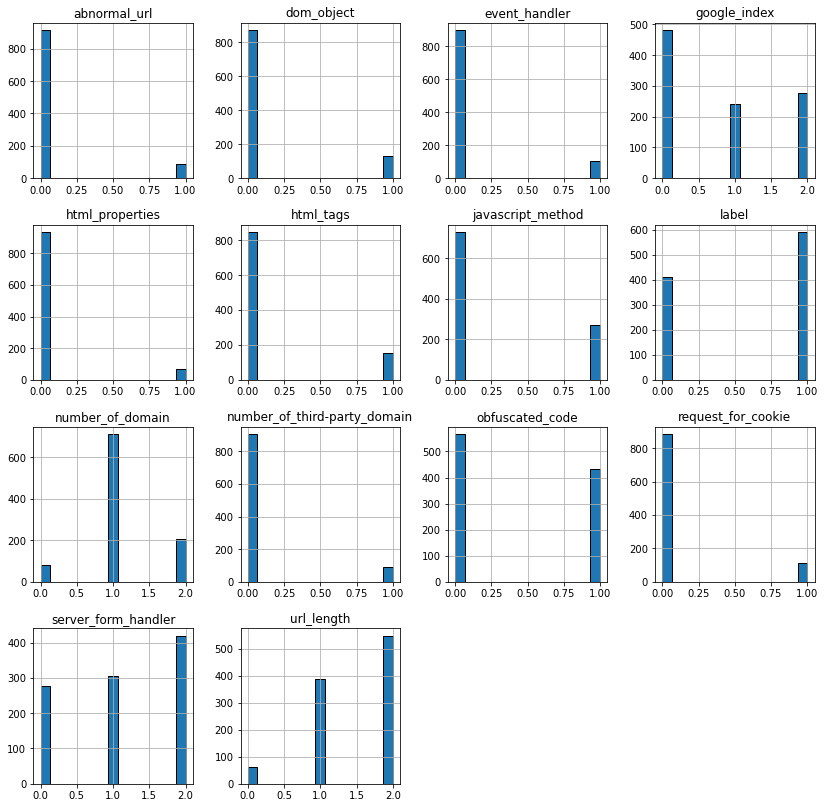

In [20]:
obj_df[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 14))
plt.savefig('count_value_barchart.png')

In [21]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (obj_df.isnull().sum()/obj_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)

missing_data

,Total,Missing Percent
abnormal_url,0,0.0
dom_object,0,0.0
event_handler,0,0.0
google_index,0,0.0
html_properties,0,0.0
html_tags,0,0.0
javascript_method,0,0.0
label,0,0.0
number_of_domain,0,0.0
number_of_third-party_domain,0,0.0


In [22]:
data['url'].duplicated().sum()

0

In [23]:
obj_df.duplicated().sum()

679

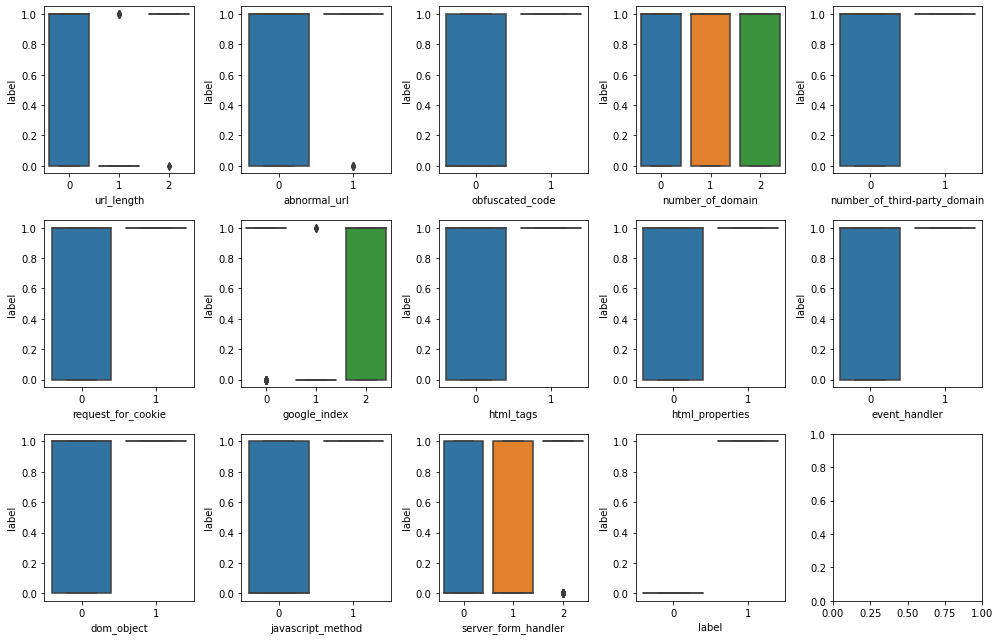

In [24]:
fig, ax = plt.subplots(3,5, figsize=(14,9))
for var, subplot in zip(data[numerical_vars], ax.flatten()):
    sns.boxplot(x=var, y='label', data=obj_df, ax=subplot)
    
fig.tight_layout()
fig.savefig('count_value_boxplot.png')

# Data Reduction

In [25]:
X = obj_df.iloc[:,0:13]
y = obj_df.iloc[:,13]

bestfeatures = SelectKBest(score_func=chi2, k = 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Value'] 
print(featureScores.nlargest(13,'Value'))

                         Feature       Value
3                obfuscated_code  300.898305
12             javascript_method  188.322034
0                     url_length  138.665098
8                      html_tags  107.016949
11                    dom_object   88.949153
1            server_form_handler   82.778298
6             request_for_cookie   79.915254
10                 event_handler   71.576271
7                   google_index   67.067716
5   number_of_third-party_domain   64.627119
9                html_properties   46.559322
2                   abnormal_url   37.722078
4               number_of_domain    1.179236


In [26]:
featureScores = featureScores.set_index('Feature')

<AxesSubplot:xlabel='Feature'>

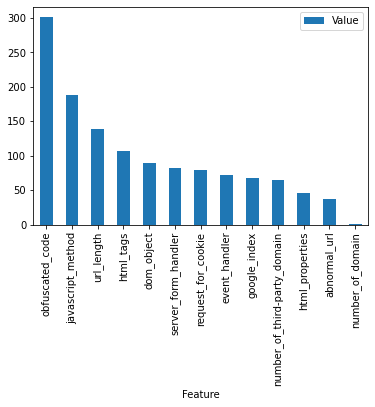

In [27]:
featureScores.sort_values(by = 'Value', ascending = False , inplace = True)
featureScores.plot(kind='bar')

# Korelasi Atribut

In [28]:
corr = obj_df.corr()
corr.head()

,url_length,server_form_handler,abnormal_url,obfuscated_code,number_of_domain,number_of_third-party_domain,request_for_cookie,google_index,html_tags,html_properties,event_handler,dom_object,javascript_method,label
url_length,1.000000,0.284483,0.080290,0.648847,-0.052551,0.195991,0.236403,-0.216155,0.281654,0.179495,0.171880,0.258454,0.383786,0.742457
server_form_handler,0.284483,1.000000,0.156717,0.229573,0.011607,0.087091,0.048310,-0.012980,0.219497,0.099669,0.085536,0.079460,0.272353,0.373999
abnormal_url,0.080290,0.156717,1.000000,0.095489,0.001412,0.112289,0.013769,0.149718,0.068646,0.076083,0.002890,0.012021,0.072324,0.203043
obfuscated_code,0.648847,0.229573,0.095489,1.000000,-0.003843,0.199650,0.260672,-0.192350,-0.115641,0.209786,0.281531,0.269279,0.175527,0.728481
number_of_domain,-0.052551,0.011607,0.001412,-0.003843,1.000000,-0.038444,-0.045803,-0.077392,-0.104111,-0.019282,-0.051082,-0.041730,-0.062323,-0.070046


<AxesSubplot:>

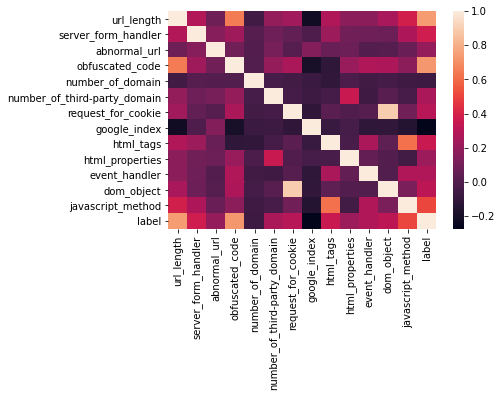

In [29]:
sns.heatmap(corr)

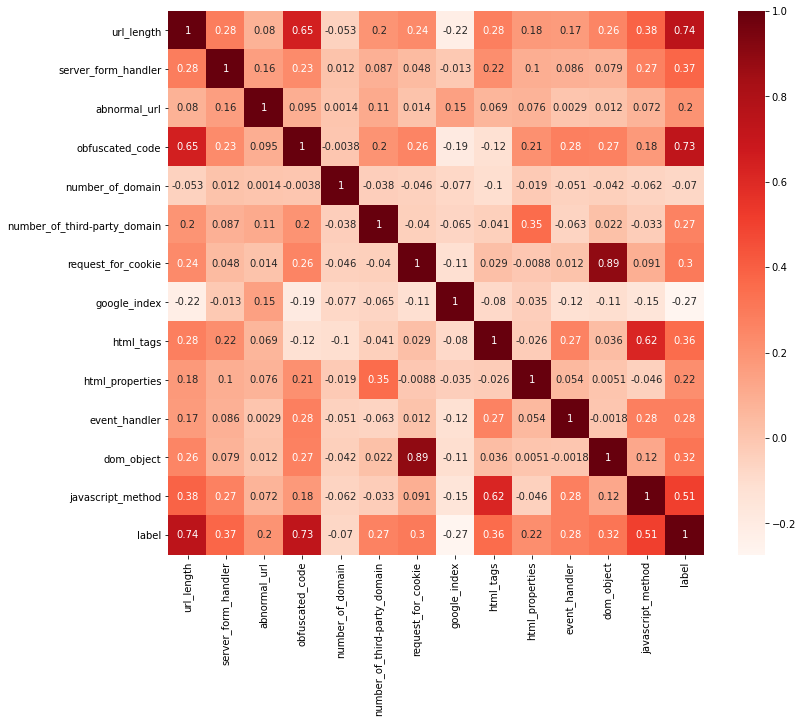

In [32]:
#pearson
plt.figure(figsize=(12,10))
cor = obj_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()